In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
from constants import *
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
gtr, _ = librosa.load("dataset/gtr_1/Gtr_1_13.wav", mono=True, sr=SR)
ney, _ = librosa.load("dataset/ney_1/Ney_1_13.wav", mono=True, sr=SR)
print(gtr.shape, ney.shape)

(96000,) (96000,)


In [3]:
ipd.Audio(gtr, rate=SR)

In [4]:
ipd.Audio(ney, rate=SR)

In [5]:
stft_gtr = librosa.stft(gtr, n_fft=N_FFT, hop_length=HOP)
stft_ney = librosa.stft(ney, n_fft=N_FFT, hop_length=HOP)
print("STFT gtr:", stft_gtr.shape)
print("STFT ney:", stft_ney.shape)
magnitude_gtr = np.abs(stft_gtr)
magnitude_ney = np.abs(stft_ney)
phase_gtr = np.angle(stft_gtr)
phase_ney = np.angle(stft_ney)
db_gtr = librosa.amplitude_to_db(magnitude_gtr)
db_ney = librosa.amplitude_to_db(magnitude_ney)

STFT gtr: (512, 1501)
STFT ney: (512, 1501)


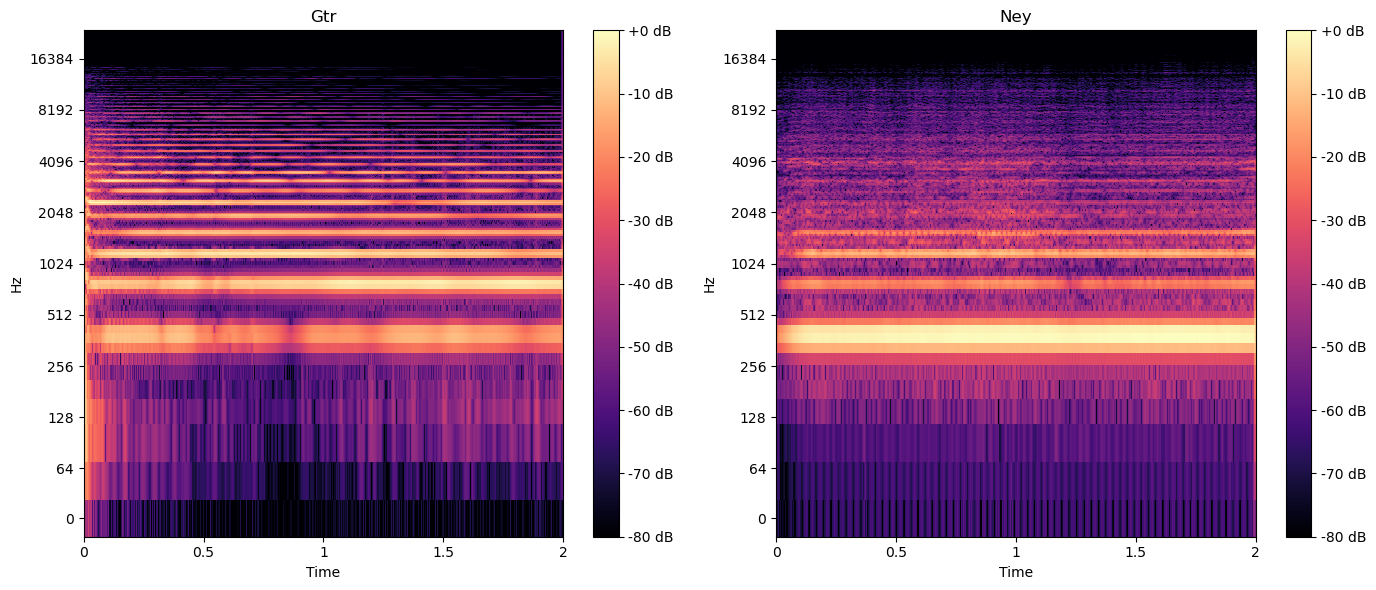

In [6]:
figure, ax = plt.subplots(1, 2, figsize=(14, 6))
# sns.heatmap(db_gtr[:200], ax=ax[0])
img = librosa.display.specshow(db_gtr-db_gtr.max(),
                               y_axis="log",
                               x_axis="time", ax=ax[0],
                               sr=SR, n_fft=N_FFT, hop_length=HOP)
ax[0].set_title("Gtr")
figure.colorbar(img, ax=ax[0], format="%+2.0f dB")

img = librosa.display.specshow(db_ney-db_ney.max(),
                               y_axis="log",
                               x_axis="time", ax=ax[1],
                               sr=SR, n_fft=N_FFT, hop_length=HOP)
ax[1].set_title("Ney")
figure.colorbar(img, ax=ax[1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

In [7]:
y_inv = librosa.griffinlim(magnitude_gtr, n_iter=64, n_fft=N_FFT,
                           hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)

In [8]:
y_inv = librosa.griffinlim(
    magnitude_gtr, n_iter=128, n_fft=N_FFT, hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)

In [9]:
y_inv = librosa.griffinlim(
    magnitude_gtr, n_iter=256, n_fft=N_FFT, hop_length=HOP, random_state=42)
ipd.Audio(y_inv, rate=SR)

In [11]:
test_0, _ = librosa.load("dataset/tests/test_0.wav", mono=True, sr=SR)
stft_0 = librosa.stft(test_0, n_fft=N_FFT, hop_length=HOP)
print("STFT test:", stft_0.shape)
magnitude_0 = np.abs(stft_0)
phase_0 = np.angle(stft_0)
db_0 = librosa.amplitude_to_db(magnitude_0)

STFT test: (512, 6001)


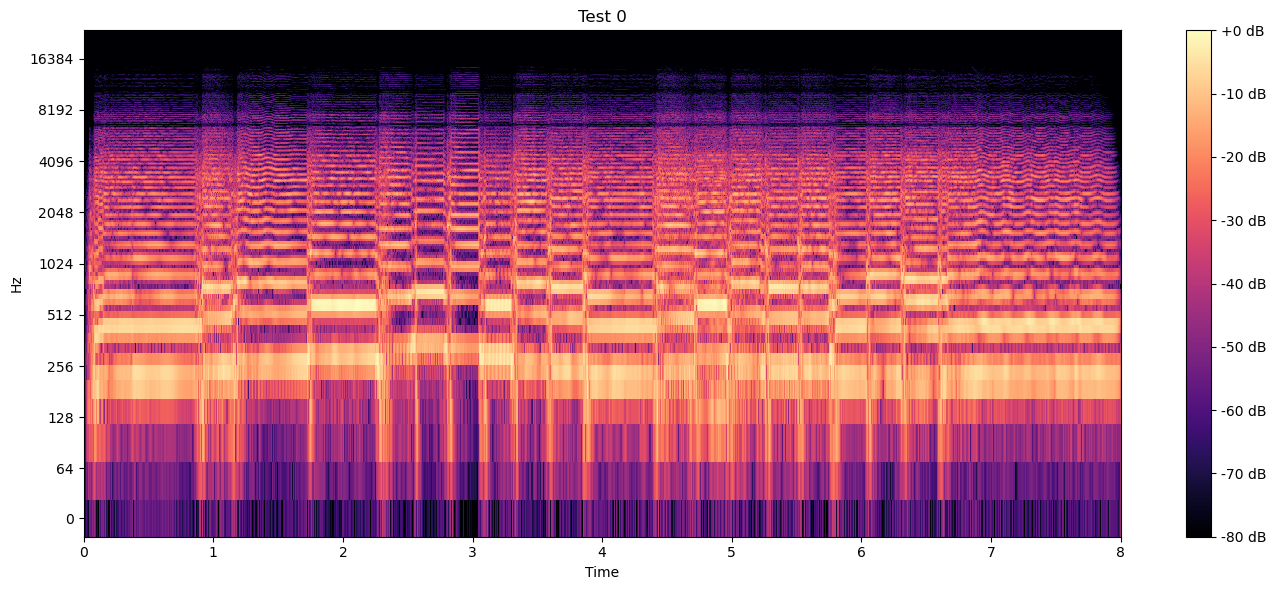

In [12]:
figure, ax = plt.subplots(figsize=(14, 6))
img = librosa.display.specshow(db_0-db_0.max(),
                               y_axis="log",
                               x_axis="time", ax=ax,
                               sr=SR, n_fft=N_FFT, hop_length=HOP)
ax.set_title("Test 0")
figure.colorbar(img, ax=ax, format="%+2.0f dB")

plt.tight_layout()
plt.show()

In [13]:
test_inv = librosa.griffinlim(magnitude_0, n_iter=64, n_fft=N_FFT,
                              hop_length=HOP, random_state=42)
ipd.Audio(test_inv, rate=SR)